In [1]:
from pyspark.sql import SQLContext, SparkSession
from nltk.tokenize import word_tokenize

In [2]:
spark = SparkSession.builder.appName("HelsinkiHotelsDemo")\
            .config("spark.some.config.option", "HelsinkiAnalysis").getOrCreate()

In [3]:
data = spark.read.json("/home/yi/Music/Sentiment-Analysis/reviewData/Tripadvisor/005_Helsinki_Tripadvisor.json")

In [4]:
# filter undesirable revords
clean_data = data.filter("review is not Null")
clean_data = clean_data.filter("score is not Null")
clean_data = clean_data.filter("hotelStars is not Null")
clean_data = clean_data.filter("hotelName is not NUll")

In [5]:
records = clean_data.groupBy(clean_data.hotelUrl).count().collect()

In [6]:
recordsRDD = spark.sparkContext.parallelize(records)

In [7]:
maxReviewRecord = recordsRDD.max(key = lambda x : x[1])

In [8]:
type(records)

list

In [9]:
maxReviewsOnehotel = clean_data.filter(clean_data.hotelUrl == maxReviewRecord.hotelUrl).collect()

In [10]:
type(maxReviewsOnehotel)

list

In [11]:
len(maxReviewsOnehotel)

1266

In [12]:
from collections import defaultdict

In [13]:
# take the hotel which has the biggest number of reviews as example.
reviews = list()
commentDates = list()
reviews_category = dict()
scores = defaultdict()
scores["0"] = 0
scores["1"] = 0
scores["2"] = 0
scores["3"] = 0
scores["4"] = 0
scores["5"] = 0
reviews_category["0"] = list()
reviews_category["1"] = list()
reviews_category["2"] = list()
reviews_category["3"] = list()
reviews_category["4"] = list()
reviews_category["5"] = list()

for record in maxReviewsOnehotel:
#     print(record)
    hotel_star = record["hotelStars"]
    review_num = 0
#     print(record.score.score)
#     print(type(score.score))
    scores[str(int(record["score"]))] += 1
    reviews_category[str(int(record["score"]))].append(record.review)
    reviews.append(record.review)
    commentDates.append(record.date)
    
        

In [14]:
scores

defaultdict(None, {'0': 0, '1': 7, '2': 26, '3': 101, '4': 499, '5': 633})

In [15]:
maxReviewsOnehotel[0]

Row(_id=Row($oid='598d91529b1f26716b0b7227'), date=None, hotelLocation='Kluuvikatu 4, Helsinki 00100, Finland', hotelName=' GLO Hotel Kluuvi Helsinki ', hotelStars='4.0', hotelUrl='https://www.tripadvisor.com/Hotel_Review-g189934-d625374-Reviews-GLO_Hotel_Kluuvi_Helsinki-Helsinki_Uusimaa.html', review='All in all the hotel can be recommended, but certain points need to be pointed out.First the good things: The staff is very friendly and always trying to help, excellent English, no problem to communicate with. The hotel is very clean and well equipped. Also, it is in the very center of Helsinki (all the major sights are within easy walking distance) and thus a good base for both leisure and business travellers.Some things were bothersome, though: For instance, in our bathroom the sink drain did not work. Even though we pointed this out to the front desk within 30 minutes of arriving, they did not manage to properly fix it until we left 3 days later. All they did was change it from perma

In [16]:
oneHotelStatistics = dict()
oneHotelStatistics["scores"] = scores
oneHotelStatistics["hotelUrl"] = maxReviewsOnehotel[0]["hotelUrl"]
oneHotelStatistics["hotelStars"] = maxReviewsOnehotel[0]["hotelStars"]

In [17]:
oneHotelStatistics["commentDates"] = commentDates

In [18]:
oneHotelStatistics["hotelLocation"] = maxReviewsOnehotel[0]["hotelLocation"]

In [19]:
oneHotelStatistics["hotelName"] = maxReviewsOnehotel[0]["hotelName"]


In [20]:
oneHotelStatistics["reviews"] = reviews

In [21]:
oneHotelStatistics["scores"]

defaultdict(None, {'0': 0, '1': 7, '2': 26, '3': 101, '4': 499, '5': 633})

In [22]:
oneHotelStatistics["hotelName"]

' GLO Hotel Kluuvi Helsinki '

In [23]:
oneHotelStatistics["hotelUrl"]

'https://www.tripadvisor.com/Hotel_Review-g189934-d625374-Reviews-GLO_Hotel_Kluuvi_Helsinki-Helsinki_Uusimaa.html'

In [24]:
def countLength(strLists):
    print(len(strLists))
    if len(strLists) == 0:
        return 0
    else:
        totalLen = 0
        for i in strLists:
#             print(len(word_tokenize(i)))
#             print(i)
            totalLen += len(word_tokenize(i))
        avgLen = totalLen/len(strLists)
        return round(avgLen)

In [25]:
len_1_score_1 = countLength(reviews_category["1"])
len_1_score_1

7


479

In [26]:
score_review_len = dict()
score_review_len["0_score_review_len"] = countLength(reviews_category["0"])
score_review_len["1_score_review_len"] = countLength(reviews_category["1"])
score_review_len["2_score_review_len"] = countLength(reviews_category["2"])
score_review_len["3_score_review_len"] = countLength(reviews_category["3"])
score_review_len["4_score_review_len"] = countLength(reviews_category["4"])
score_review_len["5_score_review_len"] = countLength(reviews_category["5"])

0
7
26
101
499
633


In [27]:
oneHotelStatistics["scores_review_len"] = score_review_len

In [28]:
oneHotelStatistics["scores_review_len"]

{'0_score_review_len': 0,
 '1_score_review_len': 479,
 '2_score_review_len': 188,
 '3_score_review_len': 155,
 '4_score_review_len': 132,
 '5_score_review_len': 120}

In [29]:
reviews_category["1"][:3]

['Have just been on a business trip to Helsinki and stayed at the GLO. When I arrived the clerk at the front dest told me that they had put me in a nice big room on the 7th Floor.The room was indeed quite big and quite to my satisfaction. Searching for the gym, I found that this was on the 8th floor. Very nicely equiped.After a long day I went to bed at 22.30. At 23.00 I woke up with a loud banging noise - it turned out that someone was working out in the gym which was located right on top of my room. Called the front desk and asked when the gym closed - the answer: "it is open 24 hours". I complained about the noise and was told that I could be moved to another room. In the middle of the night I had to collect all my belongings and move. The staff explained that I was not the first to complain. Here comes the funny part "but we are almost fully booked and someone must stay in this room". They must be joking - this is not a 2 star hotel - how can they treat guest like that?',
 'BEWARE!

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
def nltkSentScore(sentences):
    sentResult = dict()
    sid = SentimentIntensityAnalyzer()
    compoundAvgScore = 0
    negAvgScore = 0
    posAvgScore = 0
    neuAvgScore = 0
    for sent in sentences:
        ss = sid.polarity_scores(sent)
        compoundAvgScore += ss["compound"]
        negAvgScore += ss["neg"]
        posAvgScore += ss["pos"]
        neuAvgScore += ss["neu"]
    compoundAvgScore = round(compoundAvgScore/len(sentences), 2)
    negAvgScore = round(negAvgScore/len(sentences), 2)
    posAvgScore = round(posAvgScore/len(sentences), 2)
    neuAvgScore = round(neuAvgScore/len(sentences), 2)
    sentResult["neg"] = negAvgScore
    sentResult["compound"] = compoundAvgScore
    sentResult["pos"] = posAvgScore
    sentResult["neu"] = neuAvgScore
    return sentResult 

In [32]:
reviews_1star_sent = nltkSentScore(reviews_category["1"])

In [33]:
reviews_1star_sent

{'compound': 0.33, 'neg': 0.06, 'neu': 0.86, 'pos': 0.08}

In [34]:
reviews_2star_sent = nltkSentScore(reviews_category["2"])
reviews_2star_sent

{'compound': 0.11, 'neg': 0.08, 'neu': 0.81, 'pos': 0.11}

In [35]:
reviews_3star_sent = nltkSentScore(reviews_category["3"])
reviews_3star_sent

{'compound': 0.55, 'neg': 0.06, 'neu': 0.79, 'pos': 0.14}

In [36]:
reviews_4star_sent = nltkSentScore(reviews_category["4"])
reviews_4star_sent

{'compound': 0.85, 'neg': 0.03, 'neu': 0.76, 'pos': 0.21}

In [37]:
reviews_5star_sent = nltkSentScore(reviews_category["5"])
reviews_5star_sent

{'compound': 0.92, 'neg': 0.02, 'neu': 0.73, 'pos': 0.25}

In [38]:
# using TextBlob
from textblob import TextBlob

In [39]:

def textBlobSentScore(sentences):
    compoundAvgScore = 0
    for sent in sentences:
        ss = TextBlob(sent)
#         print(ss.sentiment.polarity)
        compoundAvgScore += ss.sentiment.polarity
    compoundAvgScore = round(compoundAvgScore/len(sentences), 2)
    return compoundAvgScore


In [40]:
textblob_1star_sent = textBlobSentScore(reviews_category["1"])

In [41]:
textblob_1star_sent

0.03

In [42]:
textblob_2star_sent = textBlobSentScore(reviews_category["2"])
textblob_2star_sent

0.06

In [43]:
textblob_3star_sent = textBlobSentScore(reviews_category["3"])
textblob_3star_sent

0.15

In [44]:
textblob_4star_sent = textBlobSentScore(reviews_category["4"])
textblob_4star_sent

0.28

In [45]:
textblob_5star_sent = textBlobSentScore(reviews_category["5"])
textblob_5star_sent

0.34

# stanford corenlp python wrapper


# [0, 2] star system reviews are considered as negative;
# [3,3] star system reviews are considered as neutral;
# [4,5] star system reviews are considered as positive;
# simply get their own feature.

In [46]:
neg_reviews = reviews_category["0"] + reviews_category["1"] + reviews_category["2"]

In [47]:
pos_reviews = reviews_category["4"] + reviews_category["5"]

In [48]:
print("negative reviews numbers: ", len(neg_reviews), "; postive reviews numbers: ", len(pos_reviews))
print("negative reviews percentage: ", round(100 * len(neg_reviews)/(len(neg_reviews)+len(pos_reviews)), 1), "%")

negative reviews numbers:  33 ; postive reviews numbers:  1132
negative reviews percentage:  2.8 %


In [49]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
neg_words = list()
stemmer = SnowballStemmer("english")

for neg_rev in neg_reviews:
    for sent in sent_tokenize(neg_rev):
        for w in word_tokenize(sent):
            if w.isalpha():
                w_stem = stemmer.stem(w) 
                if w_stem not in stopwords.words("english"):
                    neg_words.append(w_stem)    #Stem a word

pos_words = list()
for pos_rev in pos_reviews:
    for sent in sent_tokenize(pos_rev):
        for w in word_tokenize(sent):
            if w.isalpha():
                w_stem = stemmer.stem(w) 
                if w_stem not in stopwords.words("english"):
                    pos_words.append(w_stem)    #Stem a word

In [50]:
# print(neg_words)

In [51]:
# print(neg_words)


In [52]:
# print(neg_words)

In [53]:
from nltk.probability import FreqDist
f_neg_words = FreqDist(neg_words)
f_pos_words = FreqDist(pos_words)


In [54]:
f_neg_words_dict = dict()
f_pos_words_dict = dict()

In [56]:
for i, j in f_neg_words.most_common(100):
    f_neg_words_dict[i] = float(j)


In [57]:
for i, j in f_pos_words.most_common(100):
    f_pos_words_dict[i] = float(j)

In [58]:
type(f_neg_words.freq)
# f_neg_words.freq
i = 0
for t in f_neg_words:
    i += 1
    if i < 10:
        print(t, f_neg_words[t])

challeng 1
level 3
quiet 4
main 3
colleagu 1
downstair 2
market 1
head 7
could 10


In [59]:
import operator

sorted_f_neg_words_dict = sorted(f_neg_words_dict.items(), key=lambda value: (0 - value[1]))


In [60]:
sorted_f_pos_words_dict = sorted(f_pos_words_dict.items(), key=lambda value: (0 - value[1]))

In [61]:
import wordcloud
wc = wordcloud.WordCloud().generate_from_frequencies(sorted_f_neg_words_dict)

In [62]:
wc_pos = wordcloud.WordCloud().generate_from_frequencies(sorted_f_pos_words_dict)

In [ ]:
type(wc)

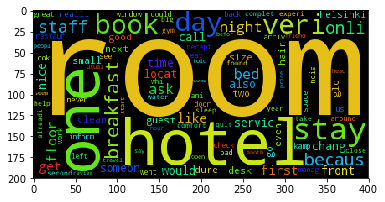

In [63]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.figure(figsize=(800, 400))
plt.show()
plt.close()

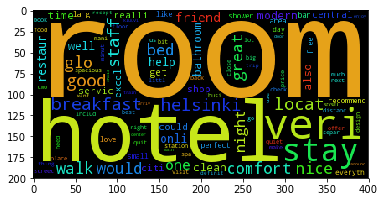

In [64]:
plt.imshow(wc_pos)
plt.show(wc_pos)